In [2]:

import cv2   # pip install 
import PIL   # pip install
import os


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

## 

#  By Directly from online url we can download the data

In [3]:
# tgz  =  ZIP file
# flower_photos = it is the name of the file(we given)
# origin        = where we take the data
# cache_dir     = where we need place the data
# untar         = is used to convert the ZIP file into the normal file

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='D:\anacoda\DL DATA NOTES', untar=True)

In [5]:
data_dir

'/tmp\\.keras\\datasets\\flower_photos'

## 

## Convert into the WindowsPath

In [6]:
# with out the windows path it can't read the data

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('/tmp/.keras/datasets/flower_photos')

##  by using the below process we can find how many are there

In [8]:
# list is compulsary

In [9]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


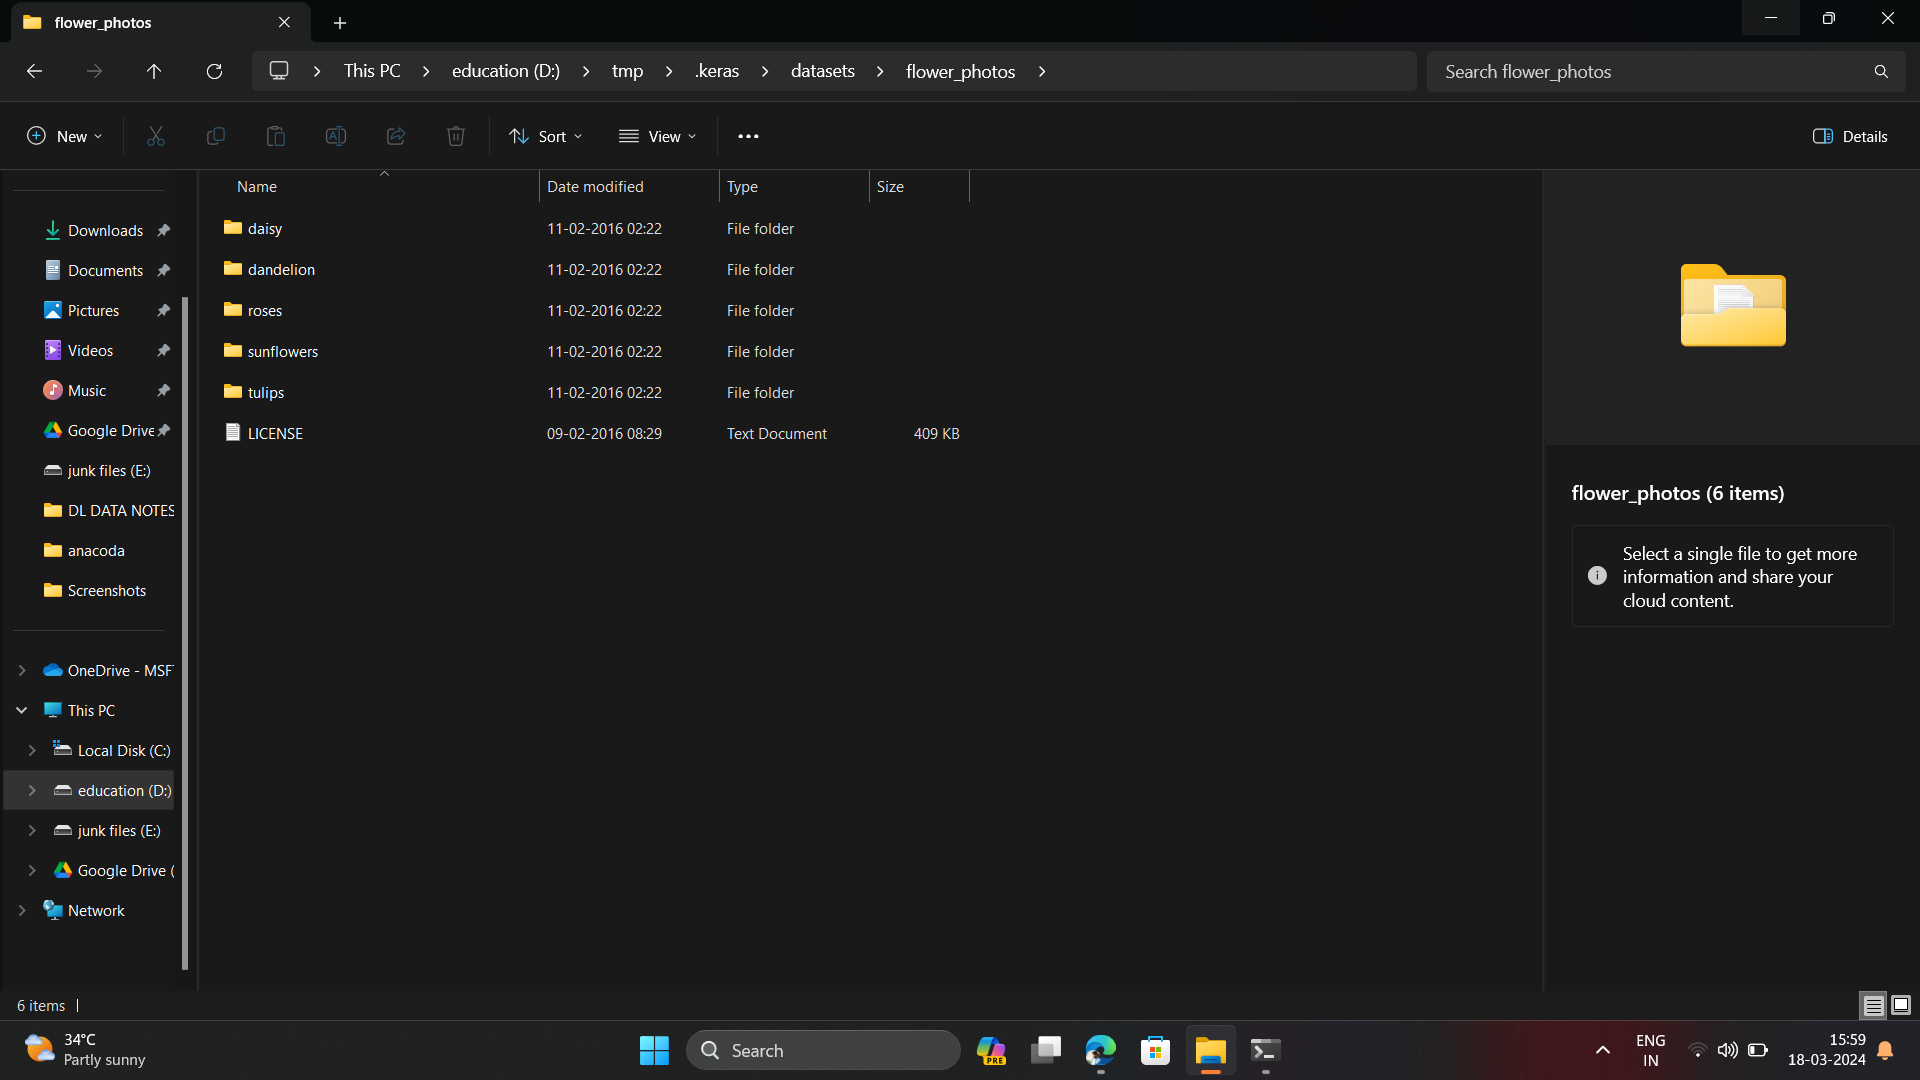

### roses 

In [11]:
roses = list(data_dir.glob('roses/*'))      # by the place of roses we can use daisy , tulips etc ...,
roses[:5]

[WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

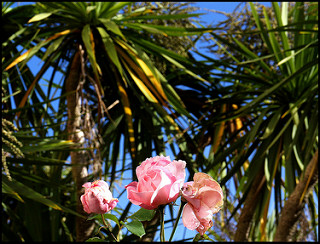

In [11]:
PIL.Image.open(roses[78])

### daisy 

In [12]:
daisy = list(data_dir.glob('daisy/*'))
daisy[:5]

[WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

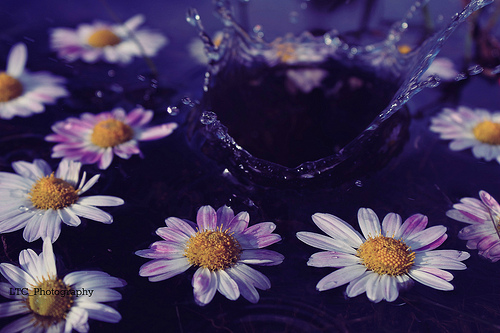

In [13]:
PIL.Image.open(str(daisy[3]))

### tulips 

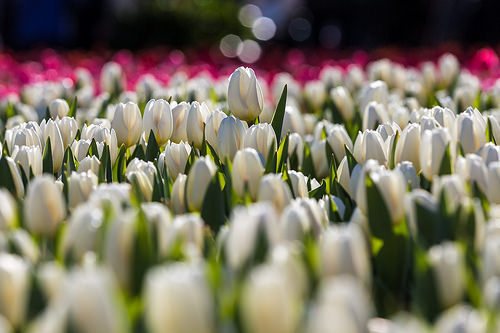

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[300]))

##  Create a Dictionary

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
flowers_images_dict['roses'][:5][4]

WindowsPath('/tmp/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')

In [18]:
flowers_images_dict['roses'][:5]

[WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [19]:
flowers_labels_dict['daisy']

1

In [20]:
flowers_labels_dict['sunflowers']

3

In [21]:
flowers_images_dict['roses'][0]

WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [22]:
# str(flowers_images_dict['roses'][0])

###  no need to use [ : values ] , we can use direct index value [ value ]
###  because it cannot fetch the multiple data , it fetch only one image at a time


##  str( ) is necessary  , because with out  str( )  it give an  error 
#### The error is :-  Can't convert object to 'str' for 'filename'

In [23]:
str(flowers_images_dict['roses'][:4][3])    # from index 0 to 4 we select the index 3  , i.e it is a individual

'\\tmp\\.keras\\datasets\\flower_photos\\roses\\10894627425_ec76bbc757_n.jpg'

In [24]:
str(flowers_images_dict['roses'][:2])   # by this like we do means it will not fetch the combine data , no need to use this like

"[WindowsPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('/tmp/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg')]"

In [25]:

# img = cv2.imread(str(flowers_images_dict['roses'][0]))
# img

In [26]:
# cv2.resize(img , (180 , 180)).shape


##  loop is compulsary

In [27]:

x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:                               # we are convert the combine-images into seperate image
        img = cv2.imread(str(image))                   # first imread the images 
        resized_img = cv2.resize(img,(180,180))        # next resize the image
        x.append(resized_img)                          # x is the imge size 
        y.append(flowers_labels_dict[flower_name])     # y should be only in numbers , lables of the flowers

In [28]:
x[:5]

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [29]:
y[:5]         # the output show what we are give the flower_lables , i.e.., = 0 = rose , 4 = tulips

[0, 0, 0, 0, 0]

##  convert data into np.array

In [30]:
import numpy as np

In [31]:
x = np.array(x)
x.shape

(3670, 180, 180, 3)

In [32]:
y = np.array(y)
y.shape

(3670,)

# train_test_split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2, random_state=0) 

In [35]:
len(x_train)

2936

In [36]:
len(x_test)

734

In [37]:
len(y_train)

2936

##  scale the data to get good accuracy

In [38]:
np.max(x_test)

255

In [39]:
x_train_scaled = x_train/255
x_test_scaled =  x_test / 255

#  CNN

In [40]:
num_classes = 5

model = keras.Sequential([
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=5) 




Epoch 1/5


92/92 [==============================] - 25s 250ms/step - loss: 1.3691 - accuracy: 0.4131
Epoch 2/5
92/92 [==============================] - 22s 242ms/step - loss: 1.0125 - accuracy: 0.5998
Epoch 3/5
92/92 [==============================] - 22s 242ms/step - loss: 0.8751 - accuracy: 0.6608
Epoch 4/5
92/92 [==============================] - 22s 243ms/step - loss: 0.7033 - accuracy: 0.7323
Epoch 5/5
92/92 [==============================] - 22s 241ms/step - loss: 0.4985 - accuracy: 0.8215


## evaluate 

In [149]:
# In this process accuracy is good but evaluate is to low , that's why this process is overfitting

In [55]:
model.evaluate(x_test_scaled , y_test)

23/23 [==============================] - 2s 65ms/step - loss: 0.9710 - accuracy: 0.6499


[0.9710094928741455, 0.6498637795448303]

##  predicting the images

In [70]:
y_pred = model.predict(x_test)
y_pred

23/23 [==============================] - 2s 67ms/step


array([[-107.54068  , 2108.0234   , -664.4366   , -725.5508   ,
         -67.16474  ],
       [ 847.4476   ,   30.503128 , -974.72217  ,  179.10458  ,
        1041.5245   ],
       [-292.39883  ,  261.6792   ,  -31.28863  ,  216.43486  ,
         -78.98948  ],
       ...,
       [-151.94423  , 1834.8647   , -293.25467  , -582.8014   ,
        -233.30139  ],
       [-341.38428  ,   24.12822  ,  255.15633  ,  864.085    ,
         524.81116  ],
       [   6.5240335,  450.1954   ,  -38.73773  ,  268.8696   ,
          -5.1192565]], dtype=float32)

##  we want to find the " score "

In [ ]:
#     roses         =       0
#     daisy         =       1
#     dandelion     =       2
#     sunflowers    =       3
#     tulips        =       4

In [191]:
score = tf.nn.softmax(y_pred[375])    # the bracket value is our predicting value
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 0.], dtype=float32)>

In [192]:
np.argmax(score)               # the argmax will show high value index

3

In [201]:
# if the argmax valu and ( y_test , y_train ) value some times not same

## y_test predection 

In [196]:
y_test[375]                       # we give the our prediction number

3

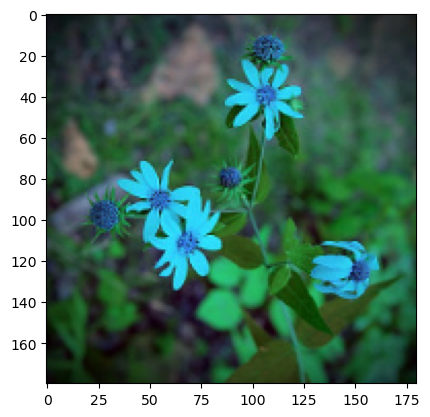

In [197]:
plt.imshow(x_test[375])   # check by the x_test or x_test_scaled   

##  y_train predection

In [198]:
y_train[78]

3

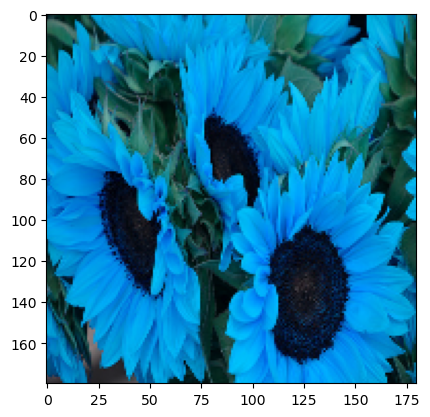

In [199]:
plt.imshow(x_train_scaled[78])

#  data_argumentation

In [270]:
data_argumentaion = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.9),
])

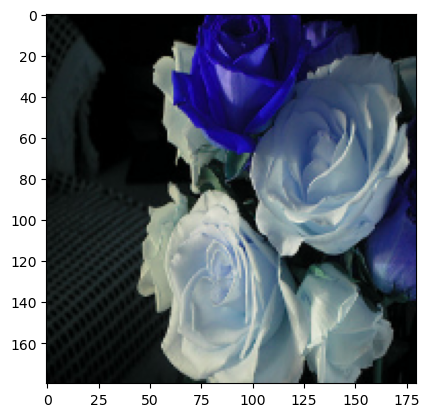

In [273]:
plt.imshow(x[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


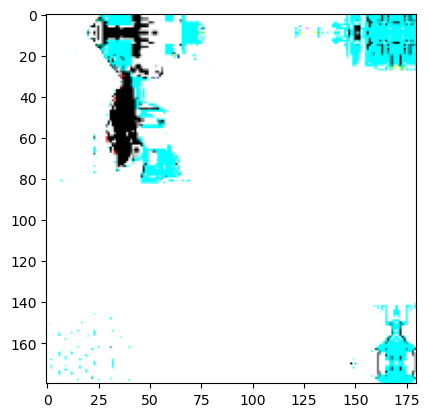

In [277]:
plt.imshow(data_argumentaion(x)[1])